In [1]:
from pyspark.sql import SparkSession
import getpass
username = getpass.getuser()
spark = SparkSession. \
    builder. \
    config('spark.ui.port','0'). \
    config('spark.shuffle.useOldFetchProtocol', 'true'). \
    config("spark.sql.warehouse.dir", f"/user/{username}/warehouse"). \
    enableHiveSupport(). \
    master('yarn'). \
    getOrCreate()

In [2]:
customers_df = spark.read \
.format("parquet") \
.load("/public/trendytech/lendingclubproject/cleaned/customers_parquet")

In [3]:
customers_df

member_id,emp_title,emp_length,home_ownership,annual_income,address_state,address_zipcode,address_country,grade,sub_grade,verification_status,total_high_credit_limit,application_type,join_annual_income,verification_status_joint,ingest_date
de8d40bb549f3e676...,Slot Club Lead,10,RENT,42000.0,CO,800xx,USA,A,A5,Source Verified,19200.0,Individual,null,null,2023-09-15 17:18:...
cb2bfe6ba8d8040ea...,Development Manager,1,MORTGAGE,120000.0,NJ,080xx,USA,B,B2,Verified,521247.0,Individual,null,null,2023-09-15 17:18:...
fd6cd0f257e376951...,Chef/Baker,5,RENT,25000.0,GA,310xx,USA,E,E2,Source Verified,18200.0,Individual,null,null,2023-09-15 17:18:...
46a7d1486ffcd4024...,Service Manager,3,MORTGAGE,122000.0,NY,113xx,USA,C,C3,Verified,232468.0,Individual,null,null,2023-09-15 17:18:...
ec70891c26a58aad8...,Maintenance Manager,1,RENT,35000.0,CO,804xx,USA,C,C1,Verified,16200.0,Individual,null,null,2023-09-15 17:18:...
8b5e4553da13c2336...,Driver,10,RENT,65000.0,NY,112xx,USA,C,C2,Verified,15200.0,Individual,null,null,2023-09-15 17:18:...
ea940e76460ba9551...,Carpenter,2,MORTGAGE,72000.0,IL,622xx,USA,B,B3,Source Verified,75875.0,Individual,null,null,2023-09-15 17:18:...
1bff1ca3a1f99b4d7...,Owner,3,RENT,103000.0,NC,282xx,USA,D,D2,Source Verified,18700.0,Individual,null,null,2023-09-15 17:18:...
78caf872bd06843ef...,Rural Carrier,10,OWN,70000.0,CA,932xx,USA,B,B4,Source Verified,71235.0,Individual,null,null,2023-09-15 17:18:...
8c0e5cf855a938944...,NotAsked,10,RENT,87600.0,CO,802xx,USA,B,B2,Source Verified,84826.0,Individual,null,null,2023-09-15 17:18:...


In [5]:
customers_df.printSchema()

root
 |-- member_id: string (nullable = true)
 |-- emp_title: string (nullable = true)
 |-- emp_length: integer (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_income: float (nullable = true)
 |-- address_state: string (nullable = true)
 |-- address_zipcode: string (nullable = true)
 |-- address_country: string (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- total_high_credit_limit: float (nullable = true)
 |-- application_type: string (nullable = true)
 |-- join_annual_income: float (nullable = true)
 |-- verification_status_joint: string (nullable = true)
 |-- ingest_date: timestamp (nullable = true)



## Creating a table out of customers data

In [4]:
spark.sql("create database itv022692_lending_club")

""


## by using the cleaned/customers_parquet file creating an external table

In [6]:
spark.sql(""" 
CREATE EXTERNAL TABLE itv022692_lending_club.customers(member_id string, emp_title string, emp_length int, home_ownership string, 
annual_income float, address_state string, address_zipcode string, address_country string, grade string, sub_grade string, 
verification_status string, total_high_credit_limit float, application_type string, join_annual_income float, verification_status_joint string, ingest_date timestamp)
stored as parquet LOCATION '/public/trendytech/lendingclubproject/cleaned/customers_parquet'
""")

""


## we can drop the table and create again the table 

In [5]:
spark.sql("drop table itv022692_lending_club.customers")

""


In [7]:
spark.sql("select * from itv022692_lending_club.customers")

member_id,emp_title,emp_length,home_ownership,annual_income,address_state,address_zipcode,address_country,grade,sub_grade,verification_status,total_high_credit_limit,application_type,join_annual_income,verification_status_joint,ingest_date
de8d40bb549f3e676...,Slot Club Lead,10,RENT,42000.0,CO,800xx,USA,A,A5,Source Verified,19200.0,Individual,null,null,2023-09-15 17:18:...
cb2bfe6ba8d8040ea...,Development Manager,1,MORTGAGE,120000.0,NJ,080xx,USA,B,B2,Verified,521247.0,Individual,null,null,2023-09-15 17:18:...
fd6cd0f257e376951...,Chef/Baker,5,RENT,25000.0,GA,310xx,USA,E,E2,Source Verified,18200.0,Individual,null,null,2023-09-15 17:18:...
46a7d1486ffcd4024...,Service Manager,3,MORTGAGE,122000.0,NY,113xx,USA,C,C3,Verified,232468.0,Individual,null,null,2023-09-15 17:18:...
ec70891c26a58aad8...,Maintenance Manager,1,RENT,35000.0,CO,804xx,USA,C,C1,Verified,16200.0,Individual,null,null,2023-09-15 17:18:...
8b5e4553da13c2336...,Driver,10,RENT,65000.0,NY,112xx,USA,C,C2,Verified,15200.0,Individual,null,null,2023-09-15 17:18:...
ea940e76460ba9551...,Carpenter,2,MORTGAGE,72000.0,IL,622xx,USA,B,B3,Source Verified,75875.0,Individual,null,null,2023-09-15 17:18:...
1bff1ca3a1f99b4d7...,Owner,3,RENT,103000.0,NC,282xx,USA,D,D2,Source Verified,18700.0,Individual,null,null,2023-09-15 17:18:...
78caf872bd06843ef...,Rural Carrier,10,OWN,70000.0,CA,932xx,USA,B,B4,Source Verified,71235.0,Individual,null,null,2023-09-15 17:18:...
8c0e5cf855a938944...,NotAsked,10,RENT,87600.0,CO,802xx,USA,B,B2,Source Verified,84826.0,Individual,null,null,2023-09-15 17:18:...


## Creating an externaltable out of loans data

In [9]:
spark.sql(""" 
CREATE EXTERNAL TABLE itv022692_lending_club.loans(loan_id string, member_id string, loan_amount float, funded_amount float, 
loan_term_years integer, intrest_rate float, monthly_installment float, 
issue_date string, loan_status string, loan_purpose string, loan_title string, ingest_date timestamp)
stored as parquet LOCATION '/public/trendytech/lendingclubproject/cleaned/loans_parquet'
""")

""


In [2]:
spark.sql("select * from itv022692_lending_club.loans")

loan_id,member_id,loan_amount,funded_amount,loan_term_years,intrest_rate,monthly_installment,issue_date,loan_status,loan_purpose,loan_title,ingest_date
13048578,ae2a45f96691a33e2...,30000.0,30000.0,5,null,836.27,Mar-2014,Fully Paid,debt_consolidation,Debt consolidation,2023-09-18 18:39:...
13028587,bc56a941d1b4a0ded...,3500.0,3500.0,3,null,119.03,Mar-2014,Fully Paid,debt_consolidation,Debt consolidation,2023-09-18 18:39:...
13048646,ec235820c5f579fe6...,20000.0,20000.0,5,null,517.94,Apr-2014,Charged Off,medical,Medical expenses,2023-09-18 18:39:...
13045633,87c71f39b975e9b1c...,10000.0,10000.0,5,null,241.12,Mar-2014,Fully Paid,credit_card,Credit card refin...,2023-09-18 18:39:...
13018547,8ce13bae24094c318...,30000.0,30000.0,5,null,794.65,Mar-2014,Fully Paid,debt_consolidation,Debt consolidation,2023-09-18 18:39:...
13048625,ebdbcd8c70b4335e9...,12000.0,12000.0,5,null,287.44,Apr-2014,Fully Paid,debt_consolidation,Debt consolidation,2023-09-18 18:39:...
13027831,e6fba3fb656b87598...,9000.0,9000.0,3,null,319.05,Mar-2014,Fully Paid,major_purchase,Major purchase,2023-09-18 18:39:...
13028614,634c0ca8f1d700224...,5000.0,5000.0,3,null,171.28,Mar-2014,Fully Paid,debt_consolidation,Debt consolidation,2023-09-18 18:39:...
13018608,83a2999b5344f3b3c...,15600.0,15600.0,5,null,354.87,Mar-2014,Fully Paid,credit_card,Credit card refin...,2023-09-18 18:39:...
13038676,d988117fe0ac6c851...,11075.0,11075.0,3,null,373.11,Mar-2014,Fully Paid,debt_consolidation,Debt consolidation,2023-09-18 18:39:...


## Creating an externaltable out of loans_repayments data

In [3]:
spark.sql(""" 
CREATE EXTERNAL TABLE itv022692_lending_club.loans_repayments(loan_id string, total_principal_received float, total_intrest_received float, 
total_late_fee_received float, total_payment_received float, last_payment_amount float, last_payment_date string, next_payment_date string, ingest_date timestamp)
stored as parquet LOCATION '/public/trendytech/lendingclubproject/cleaned/loans_repayments_parquet'
""")

""


In [4]:
spark.sql("select * from itv022692_lending_club.loans_repayments")

loan_id,total_principal_received,total_intrest_received,total_late_fee_received,total_payment_received,last_payment_amount,last_payment_date,next_payment_date,ingest_date
141581221,1055.81,null,0.0,3647.51,709.23,Mar-2019,Apr-2019,2023-09-19 05:25:...
141506948,1252.75,null,0.0,1558.79,312.63,Mar-2019,Apr-2019,2023-09-19 05:25:...
141357400,626.37,null,0.0,981.33,197.27,Mar-2019,Apr-2019,2023-09-19 05:25:...
139445427,1118.16,null,0.0,1415.52,283.95,Mar-2019,Apr-2019,2023-09-19 05:25:...
141407409,1169.72,null,0.0,4775.02,964.9,Mar-2019,Apr-2019,2023-09-19 05:25:...
141360802,2313.98,null,0.0,4826.86,952.02,Mar-2019,Apr-2019,2023-09-19 05:25:...
141163960,4689.63,null,0.0,6684.56,1342.57,Mar-2019,Apr-2019,2023-09-19 05:25:...
141533932,585.29,null,15.0,1240.82,235.13,Mar-2019,Apr-2019,2023-09-19 05:25:...
141441276,2030.82,null,0.0,2793.63,477.62,Mar-2019,Apr-2019,2023-09-19 05:25:...
141569080,1803.55,null,0.0,2914.14,585.91,Mar-2019,Apr-2019,2023-09-19 05:25:...


## Creating an externaltable out of loans_defaulters_delinq data

In [6]:
spark.sql(""" 
CREATE EXTERNAL TABLE itv022692_lending_club.loans_defaulters_delinq(member_id string, delinq_2yrs integer, delinq_amnt float,mths_since_last_delinq integer)
stored as parquet LOCATION '/public/trendytech/lendingclubproject/cleaned/loans_defaulters_delinq_parquet'
""")

""


In [7]:
spark.sql("select * from itv022692_lending_club.loans_defaulters_delinq")

member_id,delinq_2yrs,delinq_amnt,mths_since_last_delinq
9cb79aa7323e81be1...,2,0.0,0
aac68850fdac09fd0...,1,0.0,0
c89986155a070db2e...,1,0.0,15
4e1c30a5dfe9f1e20...,0,0.0,34
1eef79a0e79b72c7a...,1,0.0,0
ec1953dba2cfb89ad...,2,0.0,0
3712c9da85e54b7b1...,1,0.0,0
030e5c9c411c936c5...,2,0.0,0
252736f8401b6b046...,2,0.0,0
2d73c65a7b7d1a351...,1,0.0,0


## Creating an externaltable out of loans_defaulters_detail_record_enquires data

In [3]:
spark.sql(""" 
CREATE EXTERNAL TABLE itv022692_lending_club.loans_defaulters_detail_records_enquire(member_id string, pub_rec integer, pub_rec_bankruptcies integer,inq_last_6mths integer)
stored as parquet LOCATION '/public/trendytech/lendingclubproject/cleaned/loans_defaulters_detail_records_enq_parquet'
""")

""


In [4]:
spark.sql("select * from itv022692_lending_club.loans_defaulters_detail_records_enquire")

member_id,pub_rec,pub_rec_bankruptcies,inq_last_6mths
9cb79aa7323e81be1...,0,0,0
0dd2bbc517e3c8f9e...,1,1,3
458458599d3df3bfc...,1,1,1
05ea141ec28b5c7f7...,0,0,0
aac68850fdac09fd0...,0,0,0
3a423e4589e89f429...,0,0,0
f1efcf7dfbfef21be...,0,0,1
c89986155a070db2e...,0,0,1
118dc629b6e134419...,0,0,0
a86fa4b7493708333...,0,0,0


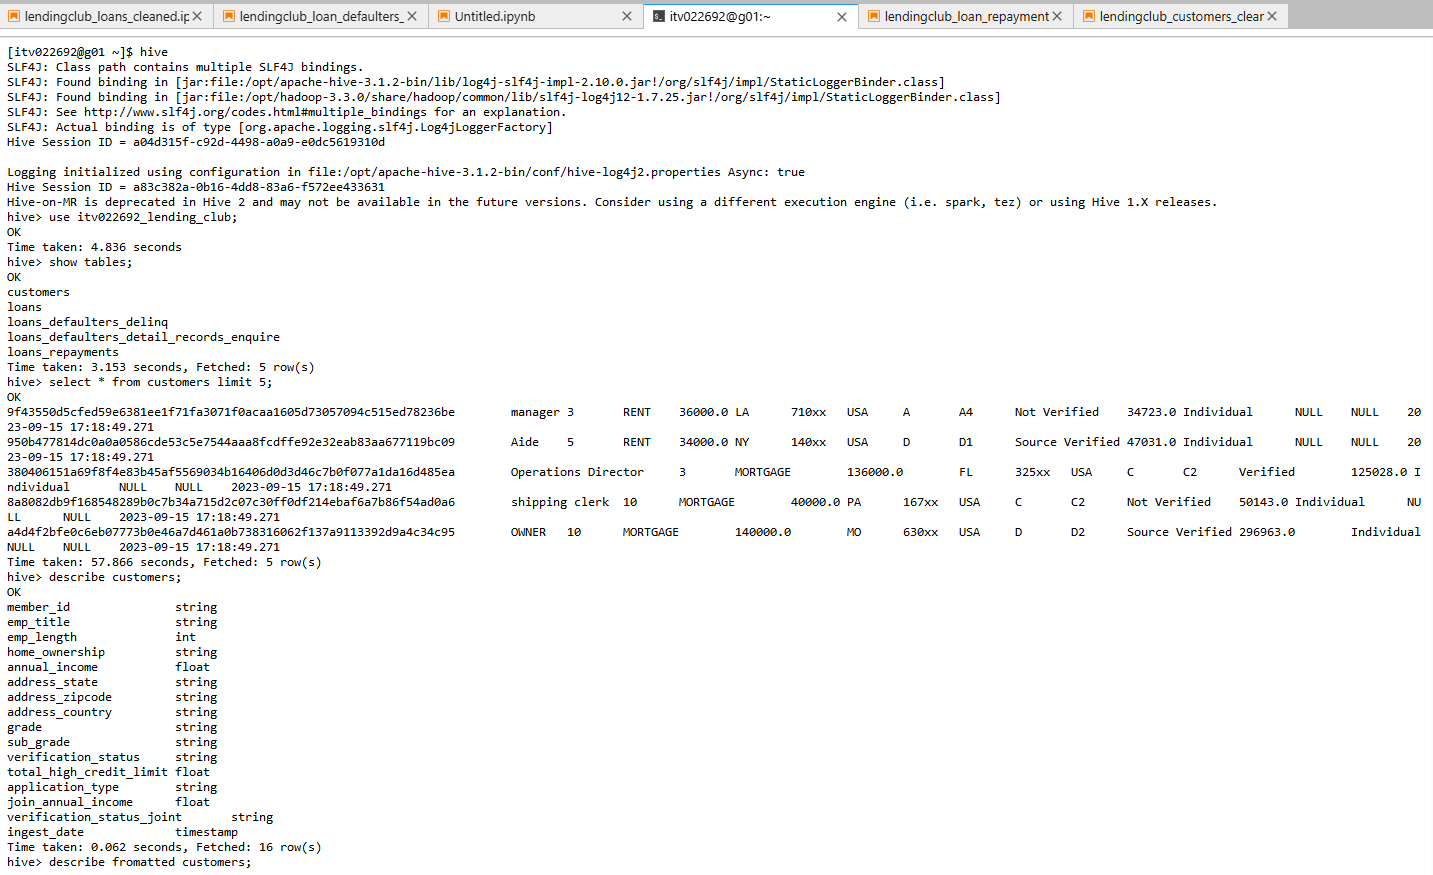

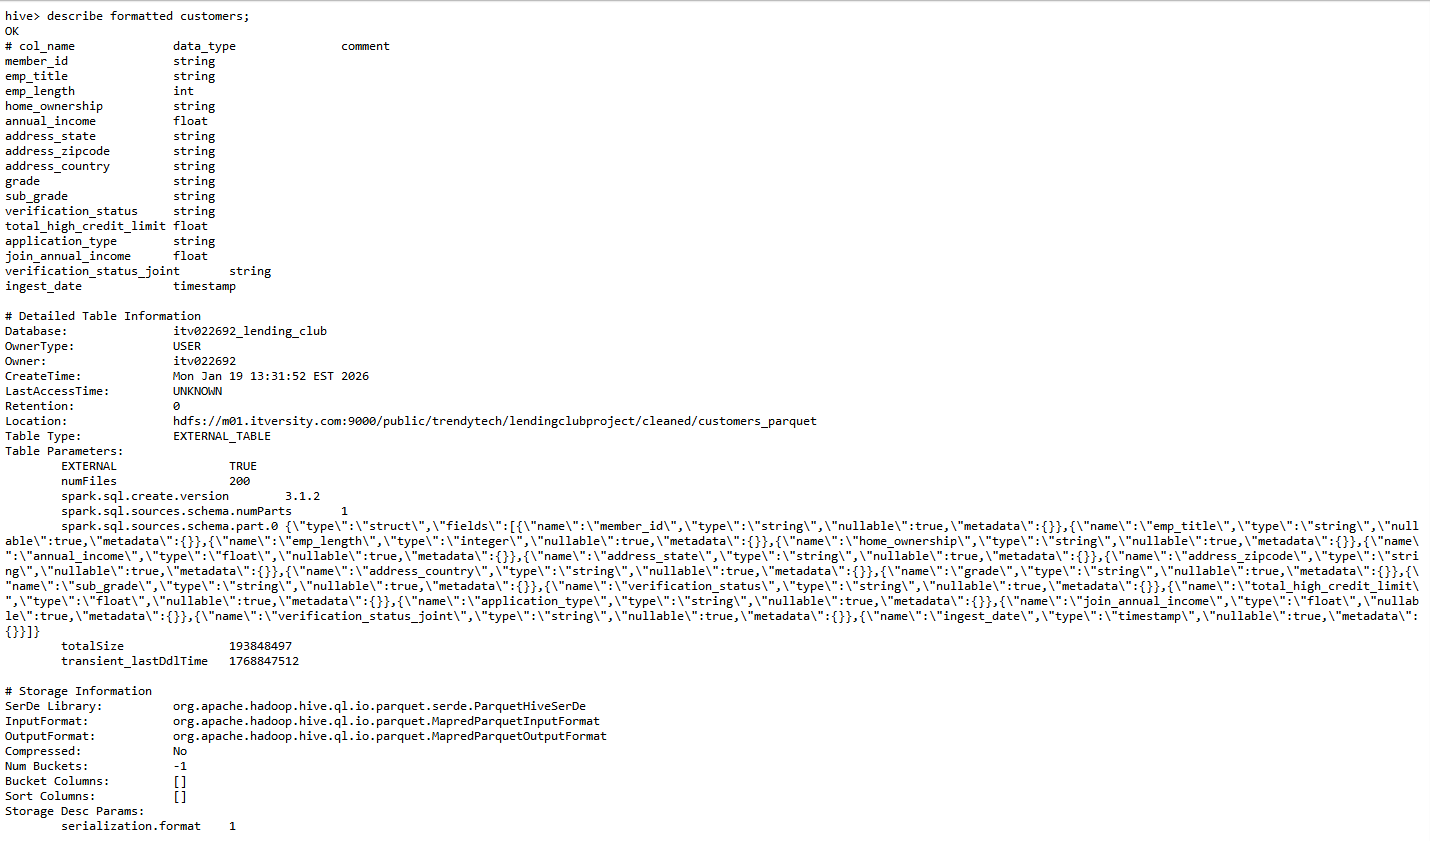